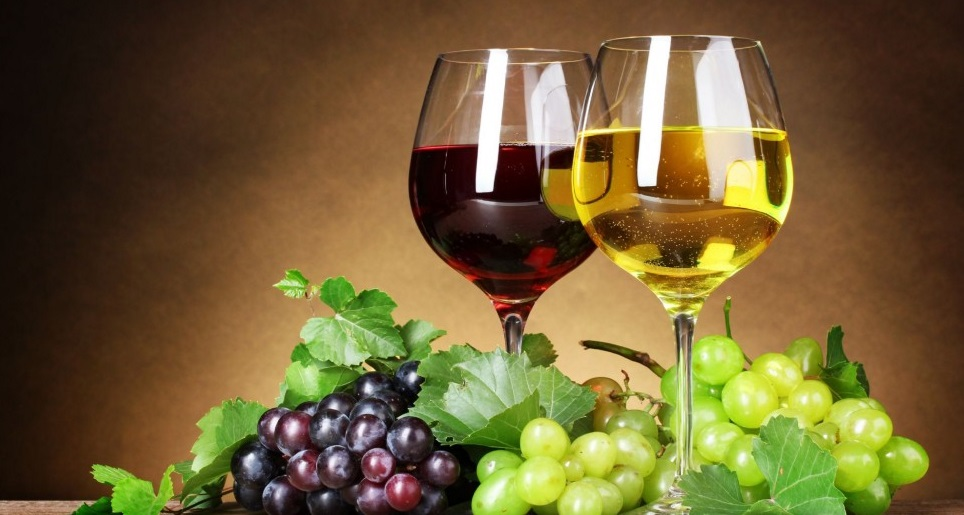

<a name="índice"></a>
# Índice
[Extra Trees Classifier](#etc)<br>
[Multi-layer Perceptron (MLP)](#rna)

# BUSINESS UNDERSTANDING

In [5]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [6]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características
# Obs1: Verificar se todos os atributos são importantes para o modelo

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [7]:
# Classificação de binhos tinto e branco

# Head

In [8]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [9]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

01/12/2023  08:33    <DIR>          .
29/11/2023  09:13    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
29/11/2023  09:27    <DIR>          .ipynb_checkpoints
01/12/2023  08:33         1.136.391 CLASSIFICA€ÇO_Wine_Kaggle_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.272.104 bytes
               3 pasta(s)   880.829.833.216 bytes dispon¡veis


# Library installation

In [10]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod
# !pip install tensorflow

# Import libs

In [11]:
# para verificar dados relativos a versão utilizada
import sys
import sklearn

# função utilizada para registrar data e hora no nome do modelo salvo
from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# trabalhar com os dados com rede neural
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
# from imblearn import under_sampling, over_sampling # verificar se realmente é necessária essa linha - reduntante!!!
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Gráfico da Árvore
from sklearn.tree import plot_tree

# Configuração da Validação Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [12]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [13]:
print(sklearn.__version__)

1.3.0


# Load data

In [14]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [15]:
df.sample(15).T

,6396,3878,2007,6381,4168,4863,2925,2958,3502,1164,4586,3960,4231,3194,5571
fixed_acidity,5.7,7.1,6.3,6.7,6.6,5.9,6.5,6.5,7.8,9.0,6.8,8.2,6.8,6.4,6.8
volatile_acidity,0.33,0.4,0.14,0.3,0.24,0.24,0.22,0.19,0.34,0.785,0.18,0.25,0.44,0.27,0.37
citric_acid,0.32,0.52,0.39,0.5,0.24,0.12,0.72,0.32,0.27,0.24,0.28,0.46,0.2,0.49,0.67
residual_sugar,1.4,1.3,1.2,12.1,8.6,1.4,6.8,1.4,1.2,1.7,9.8,3.75,16.0,7.3,1.5
chlorides,0.043,0.148,0.044,0.045,0.034,0.035,0.042,0.04,0.04,0.078,0.039,0.05,0.065,0.046,0.175
free_sulfur_dioxide,28.0,45.0,26.0,38.0,25.0,60.0,33.0,31.0,25.0,10.0,29.0,14.0,61.0,53.0,16.0
total_sulfur_dioxide,93.0,149.0,116.0,127.0,135.0,247.0,168.0,132.0,106.0,21.0,113.0,102.0,186.0,206.0,98.0
density,0.9897,0.99468,0.992,0.9974,0.99582,0.99358,0.9958,0.9922,0.9932,0.99692,0.99406,0.99524,0.99884,0.9956,0.99244
pH,3.31,3.08,3.26,3.04,3.33,3.34,3.12,3.36,3.01,3.29,3.11,3.28,3.13,3.24,3.06
sulphates,0.5,0.56,0.53,0.53,0.59,0.44,0.36,0.54,0.55,0.67,0.45,0.58,0.45,0.43,0.56


In [16]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [18]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [19]:
df.shape

(6497, 13)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [21]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [22]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [23]:
df['style'] = df['style'].replace('red', 0) # vinho tinto
df['style'] = df['style'].replace('white', 1) # vinho branco

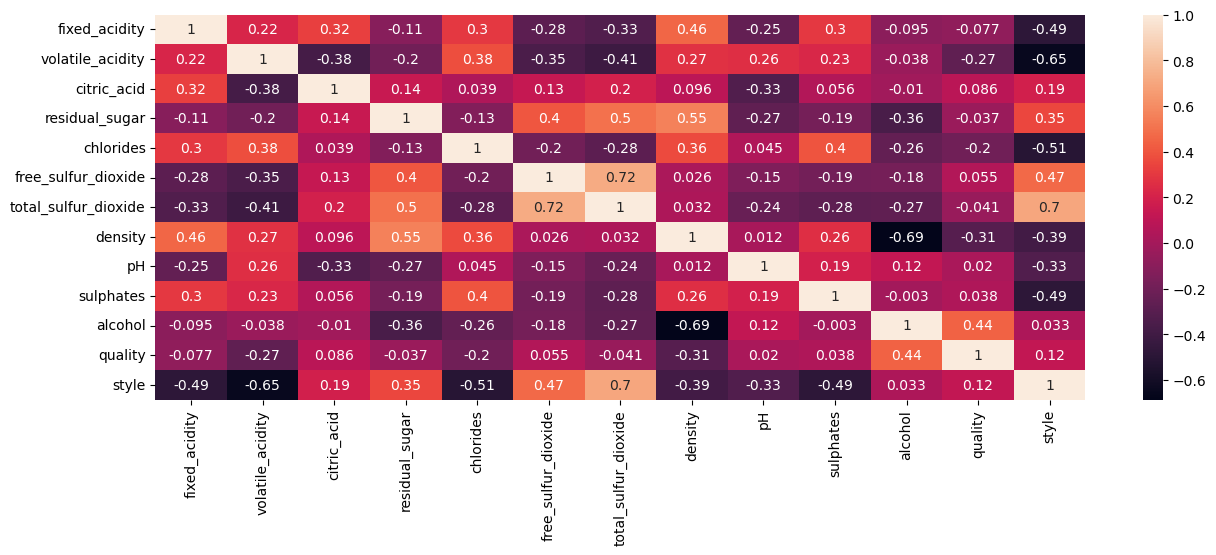

In [24]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [25]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

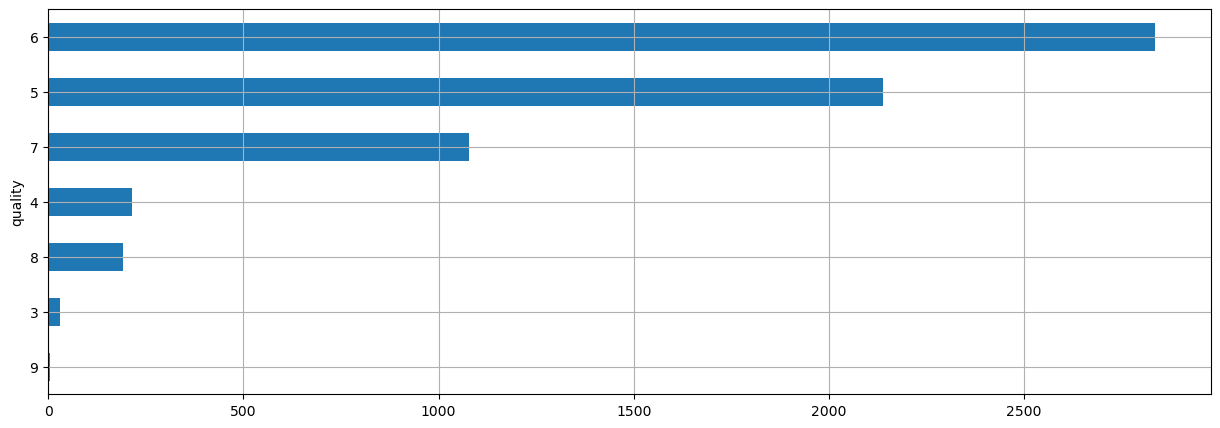

In [26]:
# wine ranking
plt.figure(figsize=(15,5))
df['quality'].value_counts(ascending=True).plot.barh()
plt.grid()
plt.show();

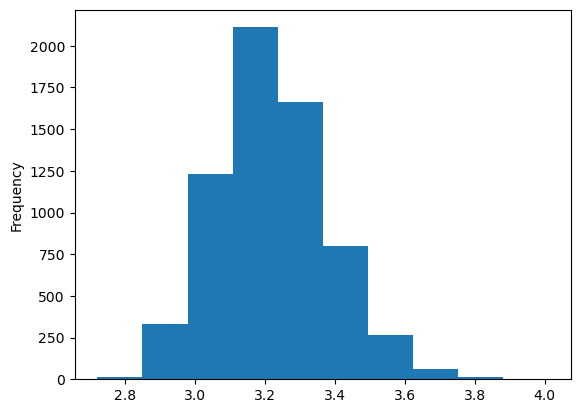

In [27]:
# frequência geral de pH dos vinhos
df['pH'].plot.hist();

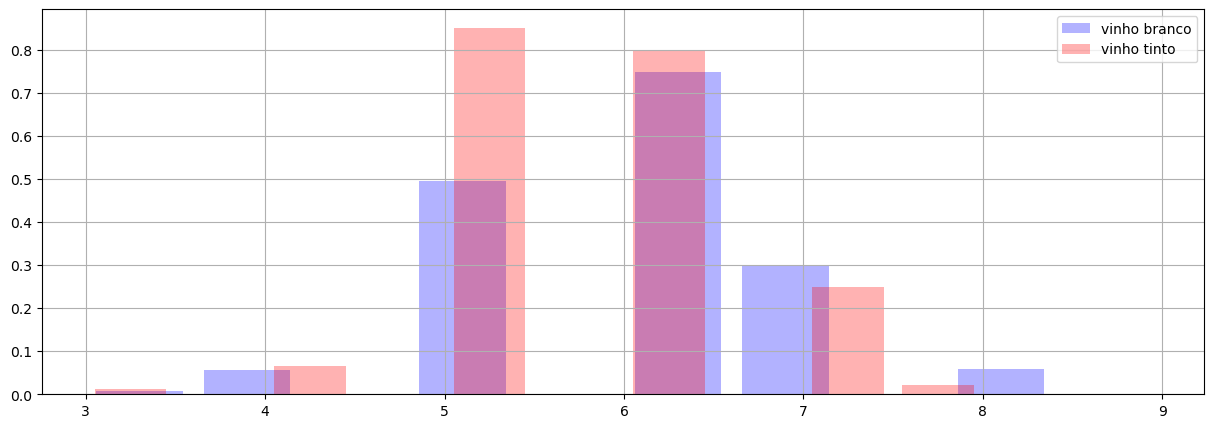

In [28]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

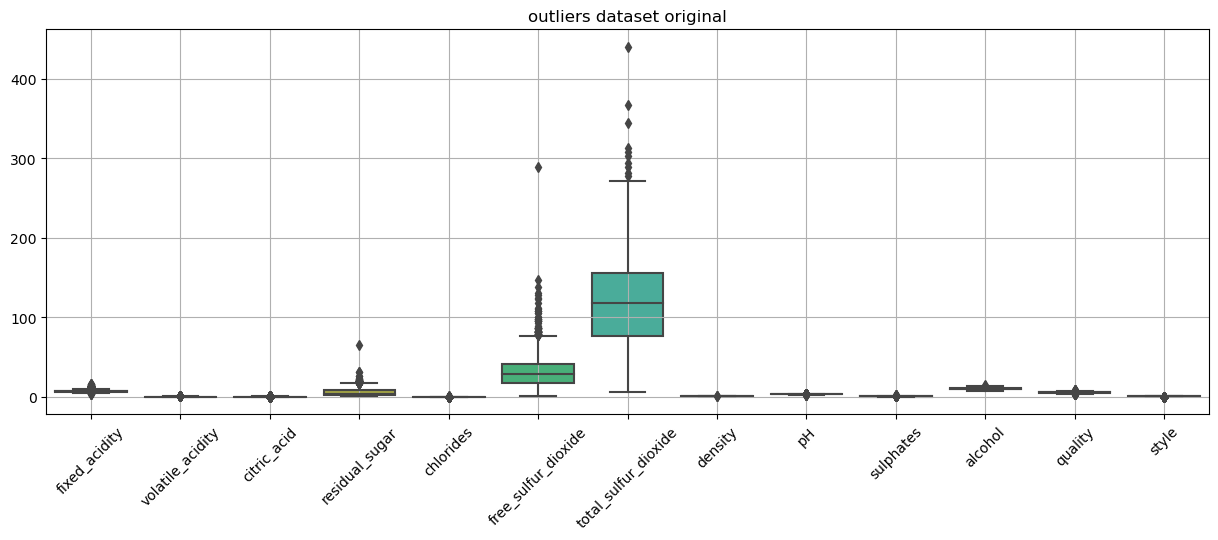

In [29]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [30]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

,perc_BLI,quant_dados_BLS,menor_valor_serie,LI_box_splot,q1,q2,q3,LS_box_splot,maior_valor_serie,quant_dados_ALS,perc_ALS
0,0.0,0,6.0,-41.5,77.0,118.0,156.0,274.5,440.0,10,0.153917


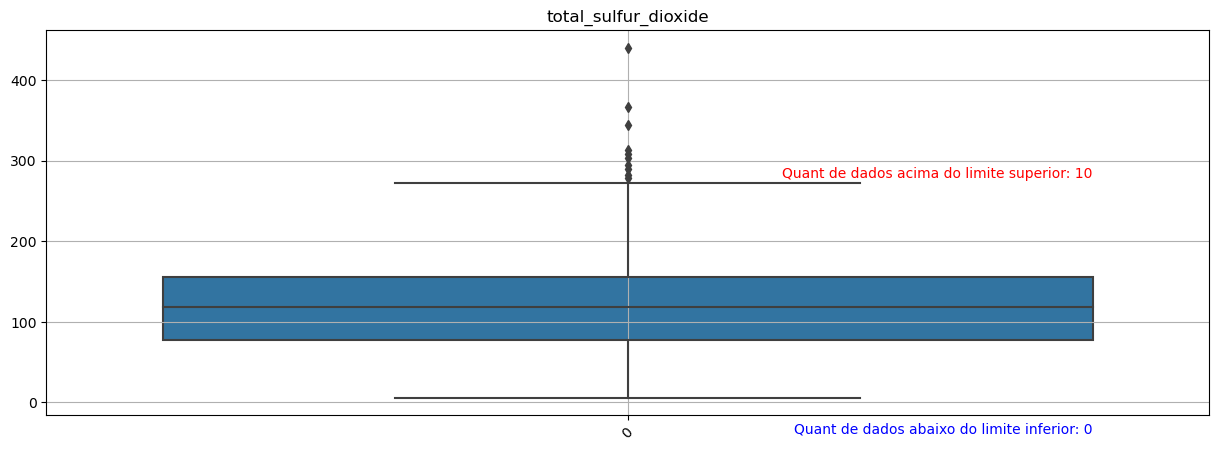

In [31]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [32]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,0
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,0
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,1
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,1
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3,1
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,1
3977,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5,1
4253,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5,1
4751,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,1
6344,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,1


In [33]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: um das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [34]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [36]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [37]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [38]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [39]:
# df_sem_outliers

In [40]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

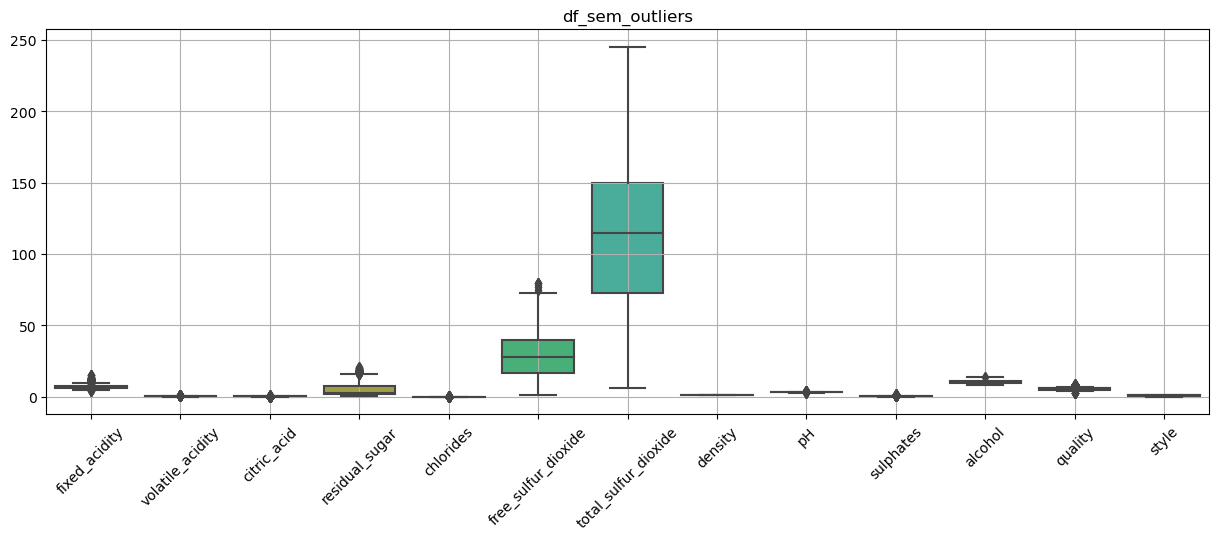

In [41]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

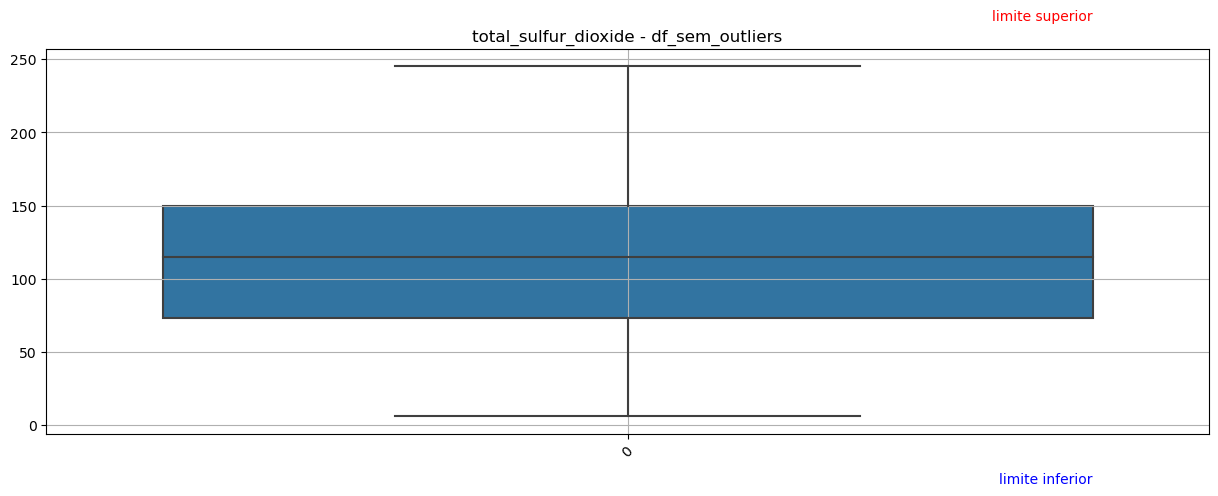

In [42]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [43]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df_sem_outliers, test_size=0.25)

In [44]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((4385, 12), (4385,))

In [45]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [46]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

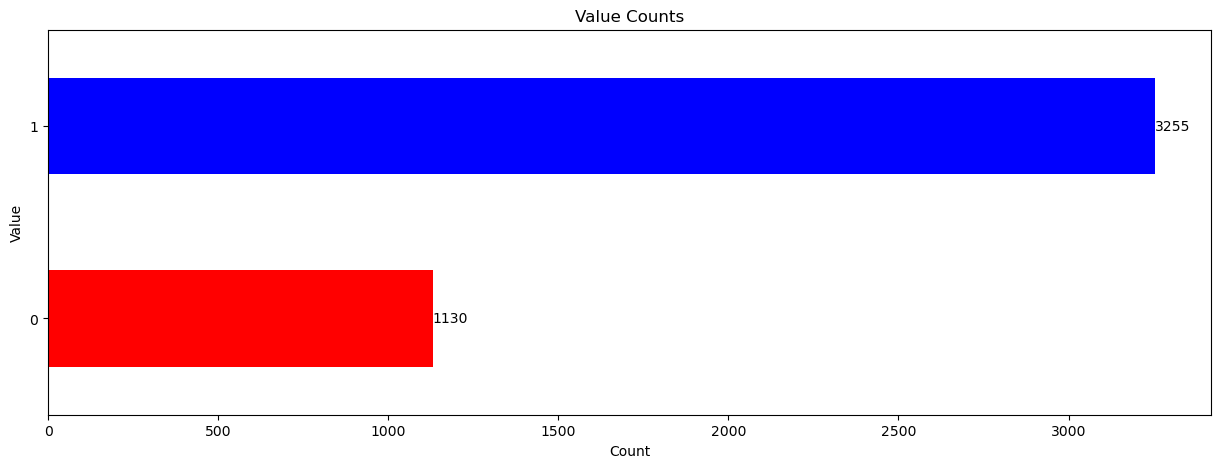

In [47]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [48]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1130, 3255], dtype=int64))

In [49]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(25.769669327251993, 74.230330672748)

# Data balancing

In [50]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [51]:
# y_bal.value_counts()

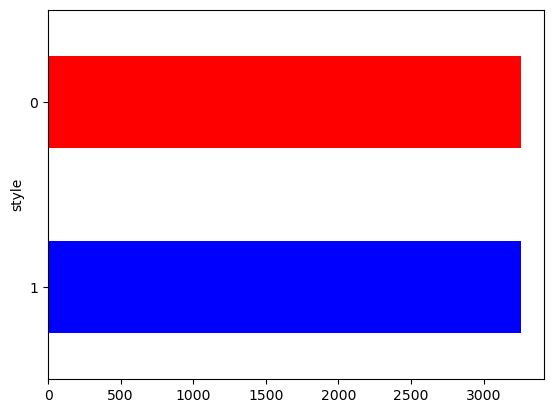

In [52]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['blue', 'red']);

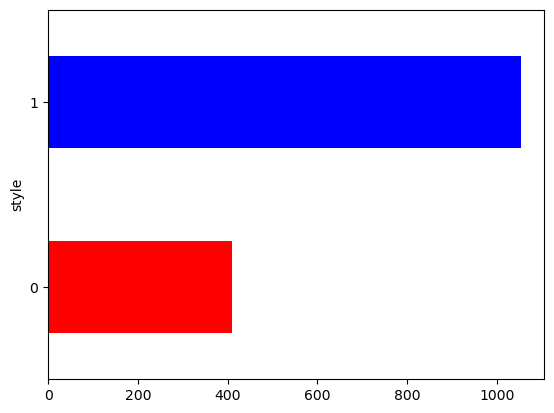

In [53]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [54]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [55]:
X_bal_padronizado.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6505,-0.163403,1.929226,-1.703123,-0.518176,0.488457,-0.837701,-1.191055,0.555022,0.984858,-0.445937,-1.006155,-0.828850
6506,0.359132,-0.404734,0.520737,-0.559888,-0.090086,-1.257090,-1.403317,-0.219462,0.184972,0.132498,0.636350,1.549208
6507,-1.052117,1.376351,-1.469597,-0.519063,0.078203,-0.566939,-1.159559,-0.330305,1.880455,1.041678,0.527406,0.360179
6508,0.963204,-0.360002,0.596990,-0.530748,0.050096,0.358872,-0.737862,0.233186,0.265120,1.837904,1.098471,1.549208
6509,2.221787,-0.551848,1.213913,-0.454421,0.057196,-1.214738,-1.206607,1.236718,-0.005469,2.002210,0.200444,0.360179


In [56]:
# df_padronizado.describe().T

In [57]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [58]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1457,1.919341,0.833087,1.777820,-0.354814,1.101809,-1.251845,-1.236803,1.974666,0.425215,0.281977,-1.276733,-0.962943
1458,-0.342800,-0.562005,-0.112242,1.567252,-0.392834,1.485504,0.450962,0.199566,-1.227472,0.281977,-0.084050,0.208291
1459,0.532867,-0.852649,-0.112242,0.710427,-0.568675,0.801167,0.394703,-0.299251,-0.782518,0.870439,1.108634,0.208291
1460,0.022061,1.879407,-0.382251,-0.748490,10.098975,-0.816358,-1.086779,0.770625,-0.401128,3.943517,-0.935966,-0.962943
1461,-0.342800,-0.794520,-0.314749,-0.679018,-0.773822,-0.194233,0.563480,-1.603056,-0.401128,0.478131,1.790167,1.379524


# Normalization

In [59]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [60]:
# df_normalizado.describe().T

In [61]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

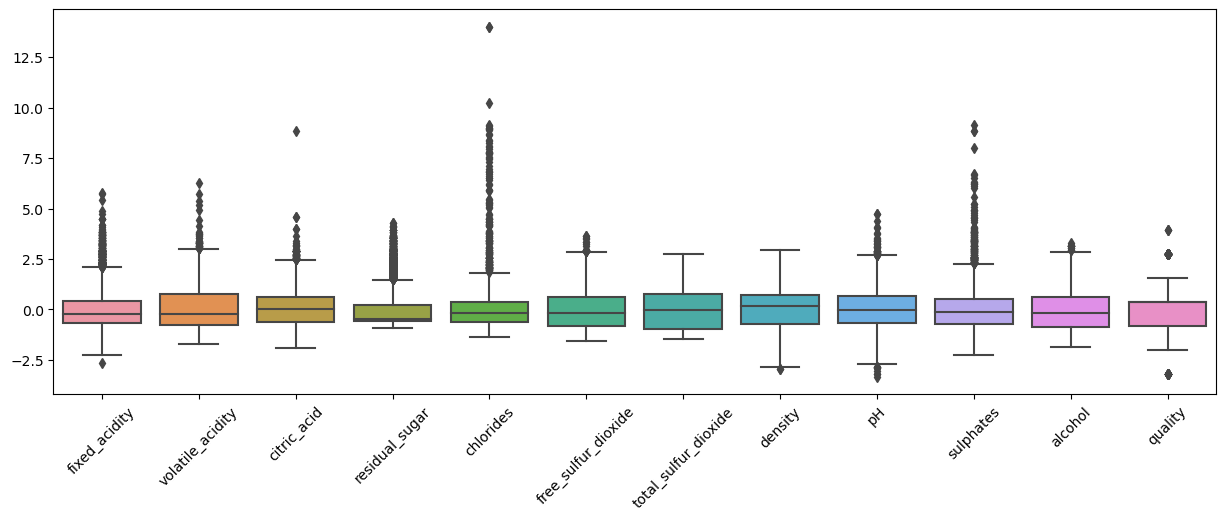

In [62]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# VALIDAÇÃO HOLDOUT
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [63]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [64]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((4557, 12), (1953, 12), (4557,), (1953,), 2312, 2245)

<a name="etc"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">
            Consultar documentação "ExtraTreesClassifier"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [65]:
# Treinar o modelo
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)
etc_y_pred = etc.predict(X_ts)

In [66]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
# etc.predict_proba(X_ts)

In [67]:
# pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

# EVALUATION

In [68]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [69]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.99529834213538

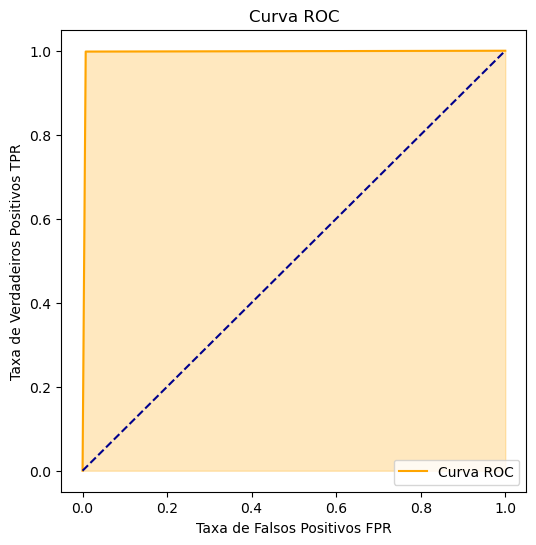

AUC: 1.00


In [70]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [71]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9953917050691244


In [72]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9953917050691244


In [73]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 0.998019801980198


In [74]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.993103448275862


In [75]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[ 936,    7],
       [   2, 1008]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [76]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9953917050691244


In [77]:
# print(classification_report(y_ts, etc_y_pred))

In [78]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9955555555555555

In [79]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

,400,401,402,403,404,405,406,407,408,409
fixed_acidity,0.095034,0.240978,-0.999551,-0.050911,-1.072523,-0.488745,0.095034,-0.196855,-1.364412,-0.707661
volatile_acidity,-0.213232,-0.678263,0.542443,1.007474,1.123732,0.484314,-0.562005,-0.155103,1.065603,-1.433938
citric_acid,-0.382251,1.170300,0.090265,-1.664793,-2.137309,-0.517255,-0.247247,-0.179744,-1.057273,-0.517255
residual_sugar,0.826214,1.150418,-0.887434,-0.841119,-0.841119,1.590409,0.513589,-0.030610,-0.540073,0.224122
chlorides,-0.246301,-0.597982,-0.216994,0.515674,-0.685902,-0.480755,-0.832435,-0.597982,-0.597982,-0.510061
free_sulfur_dioxide,1.112229,0.987804,-1.065208,-1.500695,0.676742,1.547716,-0.940783,0.738954,0.303467,-0.256446
total_sulfur_dioxide,1.819927,1.369856,0.150915,-1.668121,-0.036614,0.938539,-0.580450,0.769762,0.357197,-0.036614
density,0.598619,0.701823,-1.142080,0.908230,-1.885146,0.536697,-0.784308,-1.025116,-2.098433,0.154844
pH,0.234520,-0.909647,1.505818,0.615910,0.234520,-0.528258,-1.799555,0.997299,-0.146869,2.332161
sulphates,-1.156485,0.281977,-0.633408,1.785824,-1.221870,0.020438,-1.091101,-0.698793,-0.044946,-0.306485


# Testar o modelo com dados da base df_validation

In [80]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [81]:
len(validation)

1462

In [82]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [83]:
len(prediction)

1462

In [84]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
40 tipo(s) de vinho(s) NÃO previstos corretamente!


prediction
0    38
1     2
Name: count, dtype: int64

,seq,validation,prediction
35,1386,1,0
36,1400,1,0
37,1409,1,0
38,1428,1,0
39,1454,1,0


In [85]:
# MATRIZ CONFUSÃO - df Validação
etc_y_pred_val = etc.predict(X_val_padronizado)
confusion_matrix(y_val, etc_y_pred_val)

array([[ 407,    2],
       [  38, 1015]], dtype=int64)

# VISUAL

In [86]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [87]:
pred.min(), pred.max()

(0.002698912966915862, 0.9993512882732194)

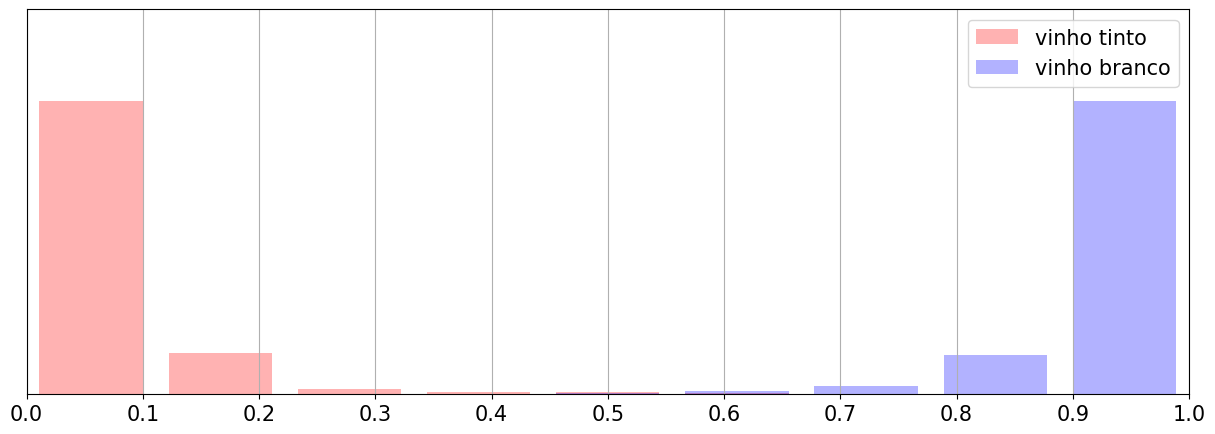

In [88]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [89]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [90]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [91]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

# INSIGHTS

In [92]:
# 1 - verificar dados outliers
# 2 - a base pode conter a nacionalidade e outras características que podem ajudar na classificação

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

# VALIDAÇÃO CRUZADA

In [93]:
# Treinar o modelo
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)

In [94]:
print(neigh)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')


In [95]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [96]:
neigh.best_params_, neigh.best_score_, neigh.best_estimator_, neigh.best_index_

({'n_neighbors': 9},
 0.9986674210251412,
 KNeighborsClassifier(n_neighbors=9),
 3)

In [97]:
neigh_y_pred = neigh.predict(X_ts)

In [98]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[ 935,    8],
       [   8, 1002]], dtype=int64)

In [99]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("neigh_acuracia:", neigh_acuracia)

neigh_acuracia: 0.9918074756784434


In [100]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
neigh_recall = recall_score(y_ts, neigh_y_pred)
print("neigh_recall:", neigh_recall)

neigh_recall: 0.9920792079207921


In [101]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
neigh_precision = precision_score(y_ts, neigh_y_pred)
print("precision_score:", neigh_precision)

precision_score: 0.9920792079207921


In [102]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       943
           1       0.99      0.99      0.99      1010

    accuracy                           0.99      1953
   macro avg       0.99      0.99      0.99      1953
weighted avg       0.99      0.99      0.99      1953



In [103]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9920792079207921

# Validação K-FOLD

In [104]:
validacao = KFold(n_splits = 10, shuffle = True)

In [105]:
reglog = cross_validate(neigh, X_bal_padronizado, y_bal, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

In [106]:
print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9917
Sensibilidade: 0.9908
     Precisão: 0.9925


# Testar o modelo com dados da base df_validation

In [183]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [184]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(neigh.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [185]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO identificados corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
59 tipo(s) de vinho(s) NÃO identificados corretamente!


prediction
0    57
1     2
Name: count, dtype: int64

,seq,validation,prediction
54,1392,1,0
55,1400,1,0
56,1409,1,0
57,1424,1,0
58,1454,1,0


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# VALIDAÇÃO CRUZADA

In [110]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [111]:
print(grid)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [112]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.945 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.939 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.943 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.916 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.912 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.927 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.932 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.928 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.925 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.980 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 2/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 3/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 4/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=2048;, score=0.998 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=2048;, score=0.982 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2;, score=0.945 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2;, score=0.939 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2;, score=0.943 total time=   0.0s
[CV

[CV 3/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.996 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.982 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.993 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.993 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.987 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.982 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.993 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2048;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [113]:
grid.best_params_, grid.best_score_, grid.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 16},
 0.9920245124760981,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16))

In [114]:
dtc_y_predct_proba = grid.predict_proba(X_ts)[:,1]

In [115]:
dtc_y_predct_proba

array([0.00151592, 0.00151592, 1.        , ..., 0.00151592, 1.        ,
       0.00151592])

In [116]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = grid.predict(X_ts)
dtc_y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

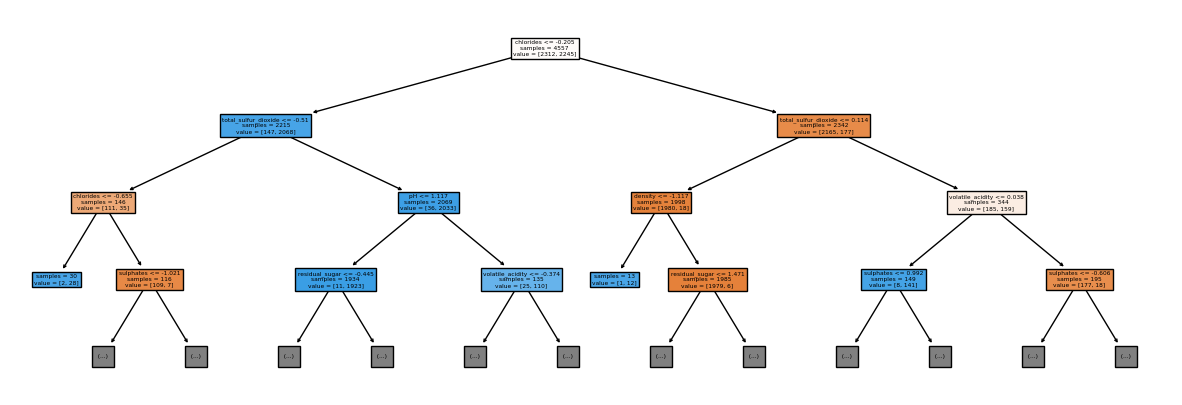

In [117]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(grid.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [118]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.9861060655376248

In [119]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[928,  15],
       [ 12, 998]], dtype=int64)

In [120]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9861751152073732


In [121]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
dtc_recall = recall_score(y_ts, dtc_y_pred)
print("dtc_recall:", dtc_recall)

dtc_recall: 0.9881188118811881


In [122]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
dtc_precision = precision_score(y_ts, dtc_y_pred)
print("precision_score:", dtc_precision)

precision_score: 0.9851924975320829


In [123]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       943
           1       0.99      0.99      0.99      1010

    accuracy                           0.99      1953
   macro avg       0.99      0.99      0.99      1953
weighted avg       0.99      0.99      0.99      1953



In [124]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9866534849233811

# Testar o modelo com dados da base df_validation

In [125]:
validation = list(y_val[0:440].values)
# print(validation)

In [126]:
prediction = list(grid.predict(X_val_padronizado[0:440]))
# print(prediction)

In [127]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

,seq,validation,prediction
0,44,1,0
1,47,1,0
2,56,1,0
3,77,0,1
4,117,1,0
5,123,1,0
6,129,1,0
7,130,1,0
8,138,1,0
9,151,1,0


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [128]:
# Treinar o modelo
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [129]:
lr_y_pred = lr.predict(X_ts)

In [130]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[ 936,    7],
       [   3, 1007]], dtype=int64)

In [131]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9948796722990272


In [132]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
lr_recall = recall_score(y_ts, lr_y_pred)
print("lr_recall:", lr_recall)

lr_recall: 0.997029702970297


In [133]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
lr_precision = precision_score(y_ts, lr_y_pred)
print("precision_score:", lr_precision)

precision_score: 0.9930966469428008


In [134]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       943
           1       0.99      1.00      1.00      1010

    accuracy                           0.99      1953
   macro avg       0.99      0.99      0.99      1953
weighted avg       0.99      0.99      0.99      1953



In [135]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9950592885375494

In [136]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[1, 0, 1, 0, 0, 0, 1, 1, 0, 1]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [137]:
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [138]:
rf_y_pred = lr.predict(X_ts)

In [139]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[ 936,    7],
       [   3, 1007]], dtype=int64)

In [140]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9948796722990272


In [141]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
rf_recall = recall_score(y_ts, rf_y_pred)
print("rf_recall:", rf_recall)

rf_recall: 0.997029702970297


In [142]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
rf_precision = precision_score(y_ts, rf_y_pred)
print("precision_score:", rf_precision)

precision_score: 0.9930966469428008


In [143]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       943
           1       0.99      1.00      1.00      1010

    accuracy                           0.99      1953
   macro avg       0.99      0.99      0.99      1953
weighted avg       0.99      0.99      0.99      1953



In [144]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9950592885375494

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Multi-layer Perceptron (MLP)
        </b>
    <br/>&nbsp;    
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification">
            Consultar documentação "Multi-layer Perceptron (MLP)"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [145]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [146]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [147]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[ 937,    6],
       [   4, 1006]], dtype=int64)

In [148]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9948796722990272


In [149]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
mlpc_recall = recall_score(y_ts, mlpc_y_pred)
print("mlpc_recall:", mlpc_recall)

mlpc_recall: 0.996039603960396


In [150]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
mlpc_precision = precision_score(y_ts, mlpc_y_pred)
print("precision_score:", mlpc_precision)

precision_score: 0.9940711462450593


In [151]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9950544015825915

In [152]:
etc_f1_score > mlpc_f1_score

True

In [153]:
mlpc.best_params_

{'alpha': 1e-07,
 'hidden_layer_sizes': (100, 70, 30),
 'learning_rate_init': 0.004641588833612777}

In [154]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.998639270077591

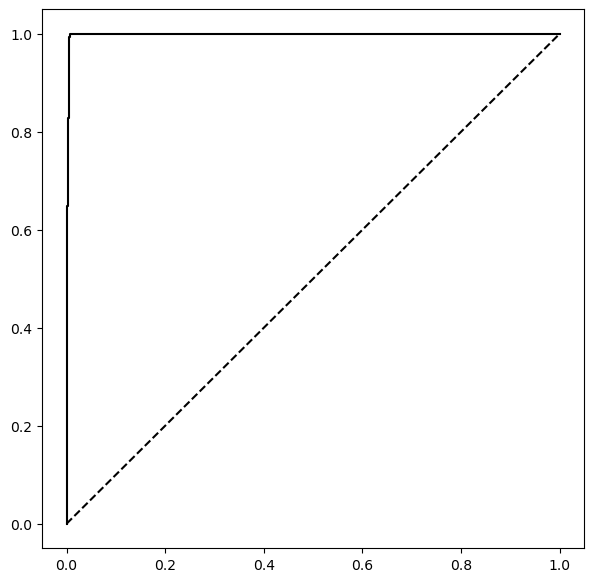

In [155]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

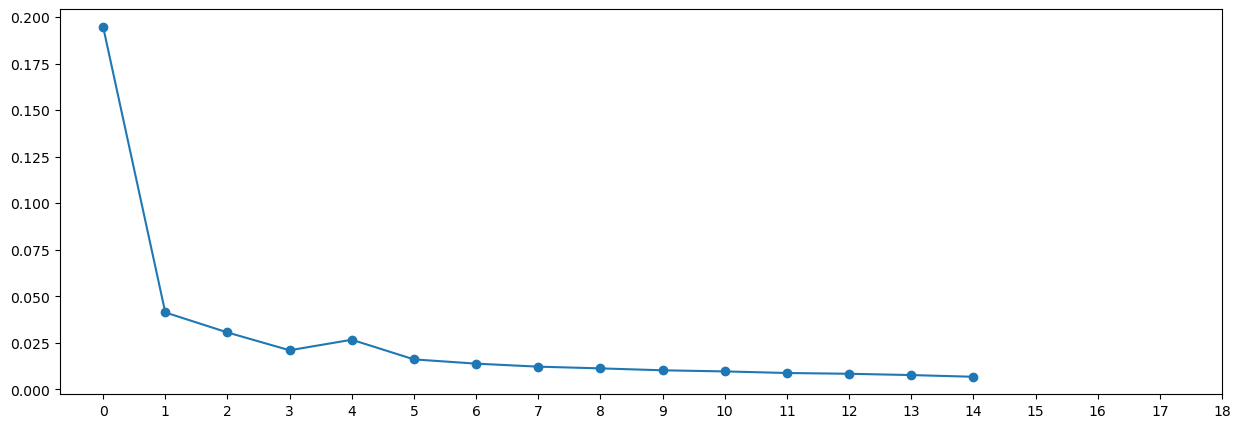

In [156]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [157]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [158]:
prediction = list(mlpc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [159]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
---
88 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    86
1     2
Name: count, dtype: int64
---


,seq,validation,prediction
83,1371,1,0
84,1386,1,0
85,1400,1,0
86,1409,1,0
87,1454,1,0


In [160]:
# MATRIZ CONFUSÃO - df Validação
mlpc_y_pred_val = mlpc.predict(X_val_padronizado)
confusion_matrix(y_val, mlpc_y_pred_val)

array([[407,   2],
       [ 86, 967]], dtype=int64)

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            TensorFlow
        </b>
    <br/>&nbsp;    
</center>

In [161]:
# ESTUDAR ESSE MODELO COM MAIS ATENÇÃO!
# VERIFICAR OS PARAMETROS
# TESTAR A BASE COM O PRÉPROESSAMENTO DO KERAS

# Criando o modelo da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_data=(X_ts, y_ts))



Epoch 1/10


143/143 [==============================] - 2s 4ms/step - loss: 0.1243 - accuracy: 0.9745 - val_loss: 0.0330 - val_accuracy: 0.9928
Epoch 2/10
143/143 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9928 - val_loss: 0.0255 - val_accuracy: 0.9949
Epoch 3/10
143/143 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9941 - val_loss: 0.0227 - val_accuracy: 0.9954
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9950 - val_loss: 0.0195 - val_accuracy: 0.9959
Epoch 5/10
143/143 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.0180 - val_accuracy: 0.9959
Epoch 6/10
143/143 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9974 - val_loss: 0.0175 - val_accuracy: 0.9959
Epoch 7/10
143/143 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0162 - val_accuracy: 0.9964
Ep

In [178]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [180]:
probabilidades = model.predict(X_val_padronizado[start:end])

# Definindo um limiar
limiar = 0.5

# Convertendo probabilidades em rótulos (0 ou 1) com base no limiar
prediction = [1 if prob >= limiar else 0 for prob in probabilidades]

# print(prediction)

46/46 [==============================] - 0s 1ms/step


In [181]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
---
67 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    65
1     2
Name: count, dtype: int64
---


,seq,validation,prediction
62,1351,1,0
63,1371,1,0
64,1386,1,0
65,1409,1,0
66,1429,1,0


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Métricas - modelos de classificação
        </b>
    <br/>&nbsp;
</center>

In [162]:
# data frame modelos
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC'],
    'accuracy':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia, mlpc_acuracia],
    'recall':[etc_recall,neigh_recall,dtc_recall, lr_recall, rf_recall, mlpc_recall],
    'precision':[etc_precision,neigh_precision,dtc_precision, lr_precision, rf_precision, mlpc_precision],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score, mlpc_f1_score]
    }    
modelos = pd.DataFrame(dfm)
modelos.style.highlight_max(subset=list(modelos.columns.drop('modelo')))

,modelo,accuracy,recall,precision,f1_score
0,Extra Trees Classifier,0.995392,0.998020,0.993103,0.995556
1,KNeighbors Classifier,0.991807,0.992079,0.992079,0.992079
2,Decision Tree Classifier,0.986175,0.988119,0.985192,0.986653
3,Logistic Regression,0.994880,0.997030,0.993097,0.995059
4,Random Forest Classifier,0.994880,0.997030,0.993097,0.995059
5,Neural Network MLPC,0.994880,0.996040,0.994071,0.995054
